# Lead Scoring Case study

## Step 1: Importing Required Libraries

In [1]:
# For analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model building
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To get rid of Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing and having a brief overview of the data

In [2]:
#Reading the data file using pandas
df = pd.read_csv('Leads.csv')

In [3]:
# Check the shape of the dataframe3
df.shape

(9240, 37)

In [4]:
# Getting all columns to be displayed 
pd.set_option('display.max_columns', 40)

In [5]:
# Getting an overview of the data
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6]:
# Statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for data types and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observations

- A large number of columns have thousands of null values. The columns where null values are above 40% of the total number of values should ideally be dropped.
- The columns where the number of null values are in the acceptable range, require either deletion of rows or substitution of null values (depending on the number of null values)
- Prospect ID and Lead Number are unique identifiers. Both serve the same purpose. Only one would be necessary. However, for model building purposes both aren't required 
- Column names are unnecessarily too long. We'll change column names.
- Few categorical columns have "Select" in their entries. These are effectively null values because "Select" appears when someone does not select anything from the dropdown menu.

## Step 3: Cleaning Data

### 3.1 - Changing column names

- Long names make analysis tiring and create issues for graphs later on
- We'll follow the 'snake_case' or the 'pothole_case' nomenclature and shorten the column names

In [9]:
# change nomenclature to 'snake_case'
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [10]:
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [11]:
# Shortening column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'dwell_time', 
                     'page_views_per_visit': 'pages_per_visit', 'how_did_you_hear_about_x_education': 'source',
                     'what_is_your_current_occupation': 'occupation', 
                     'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'course_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_the_interview'}, inplace = True)

In [12]:
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'dwell_time', 'pages_per_visit', 'last_activity', 'country',
       'specialization', 'source', 'occupation', 'course_selection_reason',
       'search', 'magazine', 'newspaper_article', 'x_education_forums',
       'newspaper', 'digital_advertisement', 'through_recommendations',
       'course_updates', 'tags', 'lead_quality',
       'supply_chain_content_updates', 'dm_content_updates', 'lead_profile',
       'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score',
       'cheque_payment', 'mastering_the_interview', 'last_notable_activity'],
      dtype='object')

### 3.2 -  Dropping unuseful columns

The following columns would be redundant - 
1. Columns which are effectively duplicates, i.e. some other column conveys what they are conveying. eg - 'prospect_id'
2. Columns which convey data from the sales team or data gained after the sales team has contacted the customer. Since our model is supposed to identify the 'hot leads' which the sales team will focus on (as contacting everybody would be an inefficient process and a waste of resources), this means that it will be deployed before the sales team contacts the customers and analyzes them. Therefore, columns - 'tags','lead_quality', all symmetrique columns,'last_activity','last_notable_activity' will be dropped
3. Columns having number of null values greater than 40%

In [13]:
# Drop prospect_id column
df.drop('prospect_id', axis = 1, inplace = True)
df.drop('lead_number', axis = 1, inplace = True)

In [14]:
# Correctly identify null values

# Replace "Select" with null values

# Selecting all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"

# Function which will tell if the columns have "Select"
s = lambda x: x.str.contains('Select', na=False) 
# List of all columns containing "Select"
l = df_obj.columns[df_obj.apply(s).any()].tolist()

print (l)

['specialization', 'source', 'lead_profile', 'city']


In [15]:
# Replacing "Select" with null values
df[l] = df[l].replace('Select', np.NaN)

In [16]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
dwell_time                       0.000000
pages_per_visit                  1.482684
last_activity                    1.114719
country                         26.634199
specialization                  36.580087
source                          78.463203
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
course_updates                   0.000000
tags                            36.287879
lead_quality                    51

We see that mostly columns generated by the sales team are the ones which possess null values greater than 40%

In [17]:
# Drop columns generated by the sales team/generated after sales team contact or those having null values > 40%

df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

### 3.3 - Handling null values and low representation of categories

If number of null values in the acceptable columns are very less (tens to few hundreds), then we can drop the rows. However if they still constitute a significant chunk of the total values, then we'll impute the values.

In [18]:
# Null values in acceptable columns

# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
dwell_time                       0.000000
pages_per_visit                  1.482684
country                         26.634199
specialization                  36.580087
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
course_updates                   0.000000
supply_chain_content_updates     0.000000
dm_content_updates               0.000000
city                            39.707792
cheque_payment                   0

#### Observations

5 still have high a significant number of null values: 'country', 'specialization', 'occupation', 'course_selection_reason', and 'city'. Let's look at them individually

### 3.3.1 - Significant number of missing values

#### "country"

In [19]:
df.country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

We see that this column is heavily skewed. 'India' itself accounts for 70% of the data. If we impute the null values with the mode, i.e. 'India' then 'India' + null values would be roughly 97% of the data. We can combine all the other countries into a column 'not India' and they still wouldn't be significant. Even if we leave the null values as it is, the skew towards India is so significant as compared to the rest that it is effectively the norm. **Therefore, we can drop this column**

In [20]:
df.drop('country', axis = 1, inplace = True)

#### "specialization"

In [21]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: specialization, dtype: float64

Since there isn't significant skew towards any 1 specialization, we can keep this column. We'll combine the specializations by course type then impute null values proportionately to maintain distribution and not introduce bias. We can see 3 types of courses - 
1. Management - The specializations containting the word 'management'
2. Business - The specializations containting the word 'business'
3. Industry specific - The specializations involving the technical aspects of different industries

In [22]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry'

In [23]:
# Finding the proportion in which the courses are present
df.specialization.value_counts(normalize = True) * 100

Management    72.576792
Industry      15.290102
Business      12.133106
Name: specialization, dtype: float64

In [24]:
# Imputing null values proportionally
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management',  
                                                    'Industry','Business',], 
                                                                   p = [0.7258, 0.1529 , 0.1213 ], size = len(df))))

#### "occupation"

In [25]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: occupation, dtype: float64

For occupation, we can first combine occupations into categories, and then impute null values proportionally to maintain the distribution and not introduce bias

In [26]:
# combine occupations with low numbers i.e. combine 'Student' with all those below
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [27]:
df.occupation.value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: occupation, dtype: float64

In [28]:
# impute null values proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

#### 'course_selection_reason'

In [29]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: course_selection_reason, dtype: float64

The data is heavily skewed towards 'Better Career Prospects'. It accounts for roughly 70% of the data. 'Better Career Prospects' + null values account for nearly 100% of the data. Even if we combine all the other columns, they still wouldn't be significant compared to 'Better Career Prospects'. Therefore, we can drop this column

In [30]:
df.drop('course_selection_reason', axis = 1, inplace = True)

#### "city"

In [31]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: city, dtype: float64

We can categorize cities and have significant/ comparable categories. we can have 3 categories - 'Mumbai', 'Non-Mumbai Maharashtrian Cities' & 'Non-Maharashtrian Cities'

In [32]:
# Categorize all Non-Mumbai Maharashtrian Cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtrian Cities'

# Categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtrian Cities'

In [33]:
df.city.value_counts(normalize = True) * 100

Mumbai                             57.835218
Non-Mumbai Maharashtrian Cities    21.701669
Non-Maharashtrian Cities           20.463113
Name: city, dtype: float64

In [34]:
# impute null-values proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtrian Cities', 
                                                                    'Non-Maharashtrian Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

### 3.3.2 - Categorical columns with low number of missing values and low representation of categories

Treatment of categorical columns (having unique values>2) involves the following-
- Merge categories that have low representation
- Impute the missing values

In [35]:
(df.isnull().sum() / df.shape[0]) * 100

lead_origin                     0.000000
lead_source                     0.389610
do_not_email                    0.000000
do_not_call                     0.000000
converted                       0.000000
total_visits                    1.482684
dwell_time                      0.000000
pages_per_visit                 1.482684
specialization                  0.000000
occupation                      0.000000
search                          0.000000
magazine                        0.000000
newspaper_article               0.000000
x_education_forums              0.000000
newspaper                       0.000000
digital_advertisement           0.000000
through_recommendations         0.000000
course_updates                  0.000000
supply_chain_content_updates    0.000000
dm_content_updates              0.000000
city                            0.000000
cheque_payment                  0.000000
mastering_the_interview         0.000000
dtype: float64

In [36]:
# determine unique values for all object datatype columns
d={}
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
course_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_the_interview = 2


We have 2 categorical columns
- 'lead_origin'
- 'lead_source'

#### "lead_origin"

In [37]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: lead_origin, dtype: float64

We don't have any null-values in this column. However we do have categories which are not significant independently. Therefore, we can club the last 3 categories

In [38]:
# Merging smaller categories
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

#### "lead_source"

In [39]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: lead_source, dtype: float64

In [40]:
# Impute null values with the mode of data
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [41]:
# Merging smaller categories
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other sources')

### 3.3.3 - Binary columns
Treatment of binary columns (number of unique values=2) involves the following-
- Drop those columns that have significant data imbalance (as their effect becomes negligible while predicting the target variable)
- Drop all those columns that have only 1 unique entry (there are supposed to be 2)

#### Columns with 1 unique value

From the previous section, we saw the columns which have 1 unique value are - 
- "magazine"
- "course_updates"
- "supply_chain_content_updates"
- "dm_content_updates"
- "cheque_payment"

They can be dropped

#### Checking for imbalances

In [42]:
# select rest of the binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_the_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: do_not_email, dtype: float64

No     99.978355
Yes     0.021645
Name: do_not_call, dtype: float64

No     99.848485
Yes     0.151515
Name: search, dtype: float64

No     99.978355
Yes     0.021645
Name: newspaper_article, dtype: float64

No     99.989177
Yes     0.010823
Name: x_education_forums, dtype: float64

No     99.989177
Yes     0.010823
Name: newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: digital_advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: through_recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: mastering_the_interview, dtype: float64



#### Observations

Because of heavy data imbalance, we can drop the following columns as well. One option becomes so significant that it becomes the norm
* `do_not_call`
* `search` 
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

In [43]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'course_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

### 3.3.4 - Numerical Columns

#### "total_visits"

Datatype should be integer and missing values should be dealt with

In [44]:
# Impute missing values with the median
df.total_visits.fillna(df.total_visits.median(), inplace=True)

# Converting datatype to integer
df.total_visits = df.total_visits.astype('int')

#### "pages_per_visit"

In [45]:
# Impute missing values with the median
df.pages_per_visit.fillna(df.pages_per_visit.median(), inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_origin              9240 non-null   object 
 1   lead_source              9240 non-null   object 
 2   do_not_email             9240 non-null   object 
 3   converted                9240 non-null   int64  
 4   total_visits             9240 non-null   int32  
 5   dwell_time               9240 non-null   int64  
 6   pages_per_visit          9240 non-null   float64
 7   specialization           9240 non-null   object 
 8   occupation               9240 non-null   object 
 9   city                     9240 non-null   object 
 10  mastering_the_interview  9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 758.1+ KB


### 3.4  - Handling Outliers

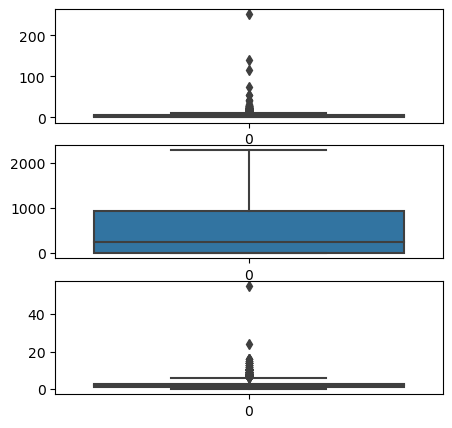

In [47]:
plt.figure(figsize = (5,5))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.dwell_time)

plt.subplot(3,1,3)
sns.boxplot(df.pages_per_visit)
plt.show()

In [48]:
df.total_visits.quantile(.99)

17.0

In [49]:
df.pages_per_visit.quantile(.99)

9.0

There are outliers in 'dwell_time' and 'pages_per_visit'. They can be capped at the 99th percentile

In [50]:
# Removing outliers in 'total_visits' column
df = df[(df.total_visits <= df.total_visits.quantile(0.99))]

# Removing outliers in 'pages_per_visit' column
df = df[(df.pages_per_visit <= df.pages_per_visit.quantile(0.99))]


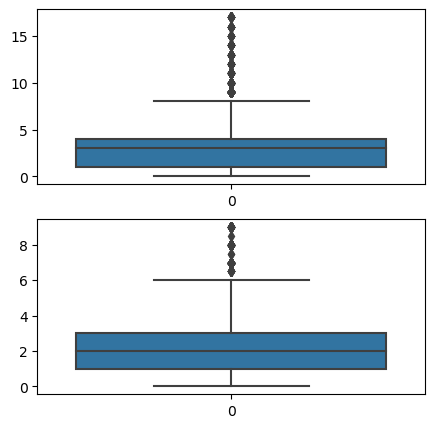

In [51]:
# Checking for outliers again
plt.figure(figsize = (5,5))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.pages_per_visit)
plt.show()

## Step 4: EDA

### 4.1 - Using pair plots to check relationship between continuous variables and target variable

<Figure size 2000x4000 with 0 Axes>

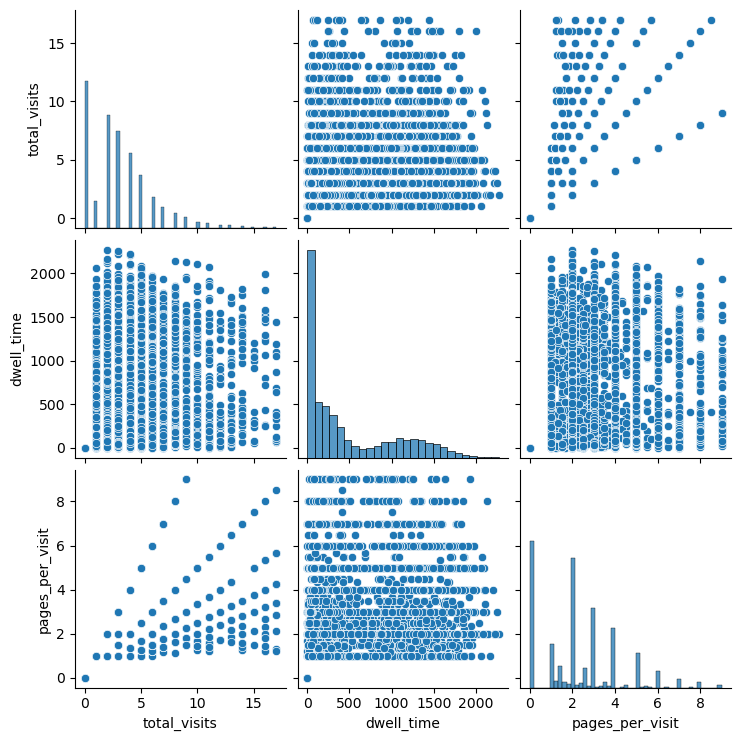

In [52]:
plt.figure(figsize = (20,40))
sns.pairplot(data=df,vars=['total_visits', 'dwell_time', 'pages_per_visit'])
plt.show()

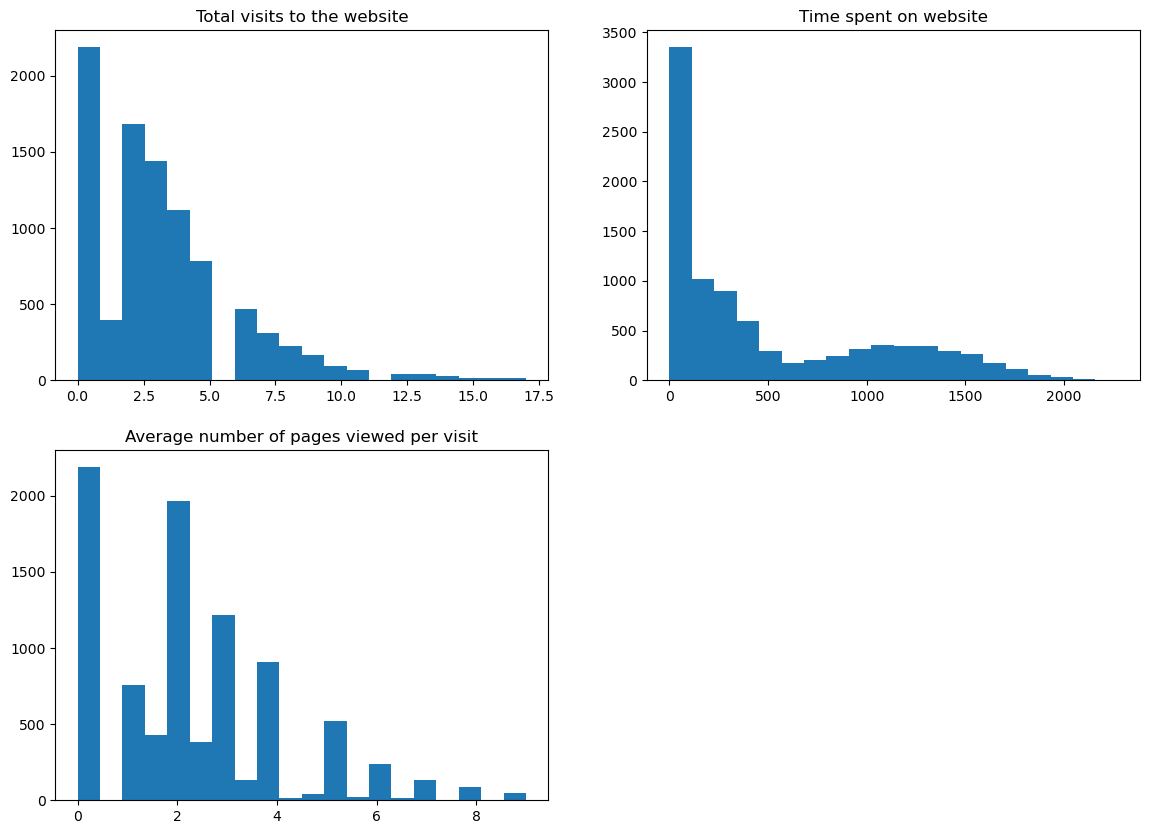

In [53]:
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total visits to the website')

plt.subplot(2, 2, 2)
plt.hist(df.dwell_time, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.pages_per_visit, bins = 20)
plt.title('Average number of pages viewed per visit')

plt.show()

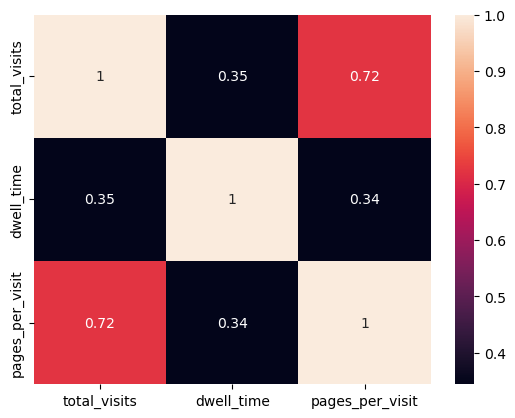

In [54]:
plt.figure()
sns.heatmap(df[['total_visits', 'dwell_time', 'pages_per_visit']].corr(), annot = True)
plt.show()

In some cases, when total visits increase, number of pages per visit increase. This is captured by the .72 correlation between the 2 in the heatmap. However, nothing significant can be drawn from this that helps in model building

### 4.2 - Continuous variabes vs target variable

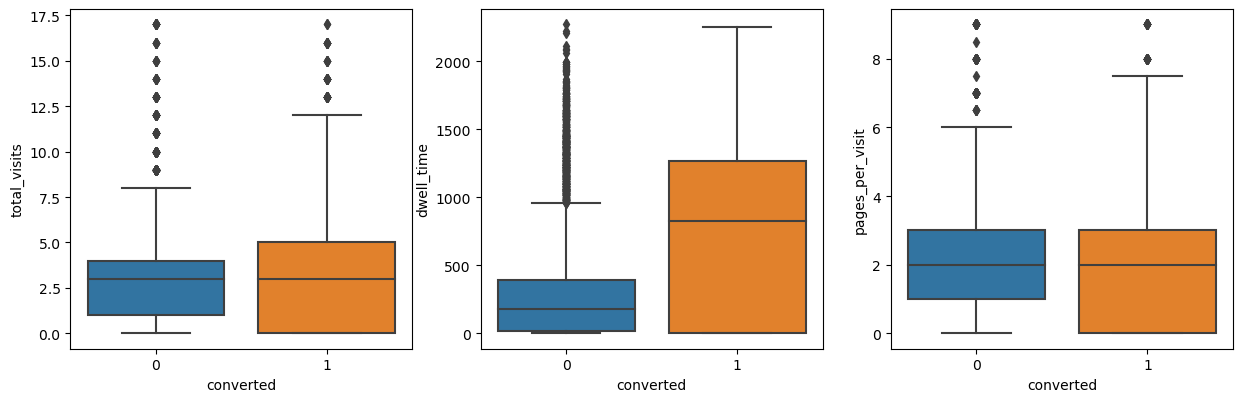

In [55]:
# Making a list of continuous variables

varcnt = ['total_visits','dwell_time','pages_per_visit']

# Getting boxplots of continuous variables vs target variable
plt.figure(figsize=(15, 15))
for i in enumerate(varcnt):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x='converted', y=i[1])
plt.show()


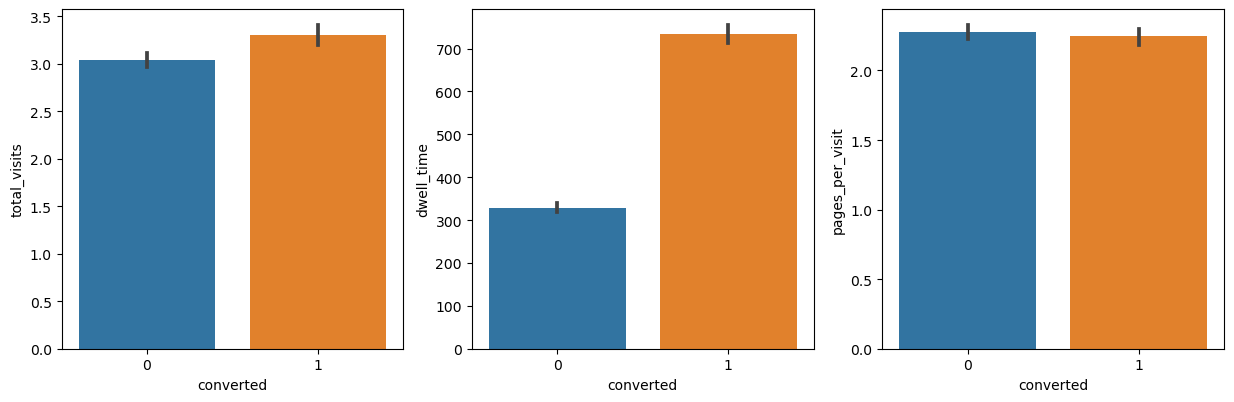

In [56]:
# Getting barplots of continuous variables vs target variable
plt.figure(figsize=(15, 15))
for i in enumerate(varcnt):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=df, x='converted', y=i[1])
plt.show()

#### Insights

- Ones with greater dwell time seem to get converted more.
- Greater total visits only increases the chances of convertion a little bit

In [57]:
df.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'total_visits', 'dwell_time', 'pages_per_visit', 'specialization',
       'occupation', 'city', 'mastering_the_interview'],
      dtype='object')

### 4.2 - Categorical variables vs target variable

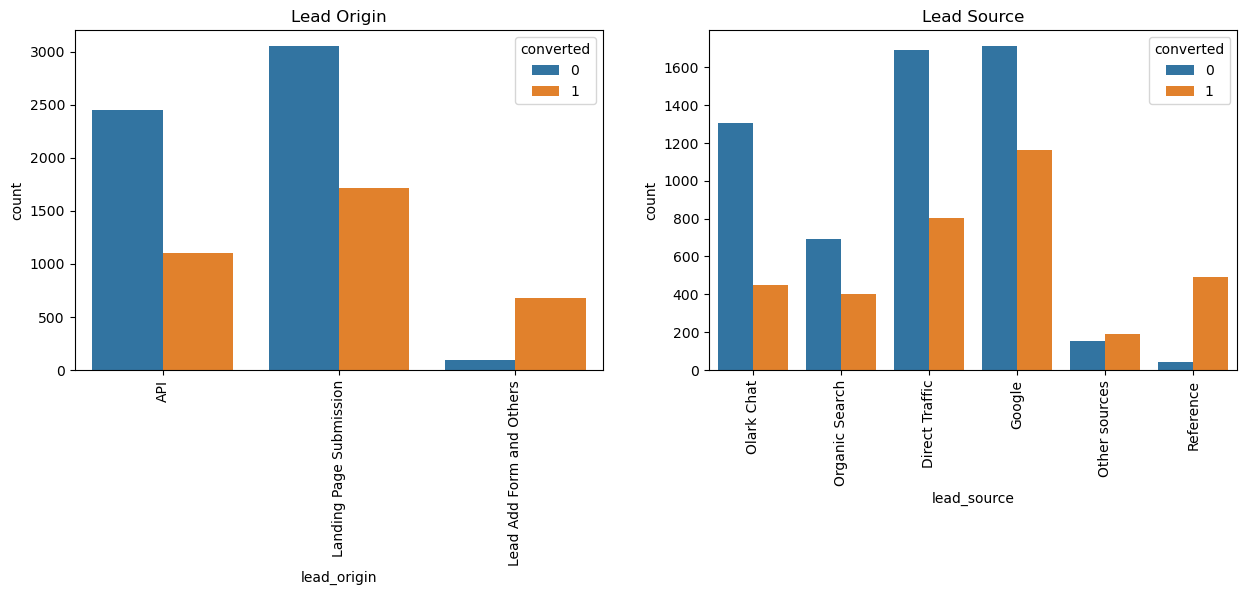

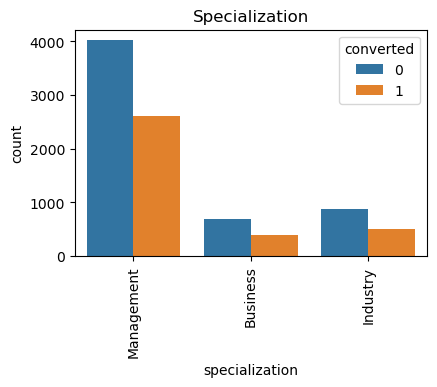

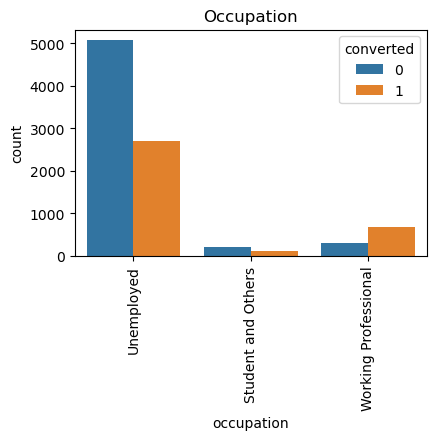

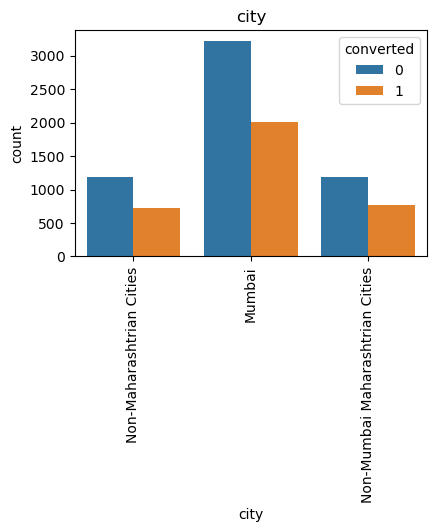

In [58]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.countplot(x='lead_origin', hue='converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(3,2,2)
sns.countplot(x='lead_source', hue='converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(3,2,3)
sns.countplot(x='specialization', hue='converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(3,2,4)
sns.countplot(x='occupation', hue='converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Occupation')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(3,2,5)
sns.countplot(x='city', hue='converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('city')
plt.show()

In [59]:
df.lead_origin.unique()

array(['API', 'Landing Page Submission', 'Lead Add Form and Others'],
      dtype=object)

#### Insights
1. 'lead_origin'-
- Order of getting customers - 'Landing Page Submission'>'API'>'Lead Add Form and Others'
- Even though 'Lead Add Form' gets the least amount of customers, the conversion rate is the highest

2. 'lead_source'- 'Reference' seems to have the highest conversion rate. Apart from this, no other source seems to have a significant impact on conversion

3. 'specialization' - No specialization seems to have a significant impact on conversion

4. 'Occupation' - Working professionals have a greater chance of conversion

5. 'city' - City doesn't seem to have a significant impact on conversion


## Step 5 - Data Preparation

### 5.1 - Creating response flags (0/1) for binary variables 

In [60]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_the_interview = 2


We have two binary columns - "do_not_email", "mastering_the_interview"

In [61]:
binvar = ['do_not_email', 'mastering_the_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binvar] = df[binvar].apply(binary_map)

In [62]:
# Checking the flags
print(df.do_not_email.unique())
print(df.mastering_the_interview.unique())

[0 1]
[0 1]


### 5.2 - Creating dummy variable for categorical variables

Categorical variable: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [63]:
# Creating a dummy variables for the categorical variables and dropping the first one as it is redundant
dummy1 = pd.get_dummies(df[['lead_origin','lead_source', 'specialization', 'occupation', 'city']], drop_first = True)
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df

,lead_origin,lead_source,do_not_email,converted,total_visits,dwell_time,pages_per_visit,specialization,occupation,city,mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other sources,lead_source_Reference,specialization_Industry,specialization_Management,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtrian Cities,city_Non-Mumbai Maharashtrian Cities
0,API,Olark Chat,0,0,0,0,0.00,Management,Unemployed,Non-Maharashtrian Cities,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,API,Organic Search,0,0,5,674,2.50,Business,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business,Student and Others,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry,Unemployed,Mumbai,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2,1428,1.00,Business,Unemployed,Mumbai,0,1,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8,1845,2.67,Management,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,1,1,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2,238,2.00,Industry,Unemployed,Mumbai,1,1,0,0,0,0,0,0,1,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2,199,2.00,Business,Unemployed,Mumbai,1,1,0,0,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,0,1,3,499,3.00,Management,Student and Others,Non-Maharashtrian Cities,0,1,0,1,0,0,0,0,0,1,0,0,1,0


In [64]:
df

,lead_origin,lead_source,do_not_email,converted,total_visits,dwell_time,pages_per_visit,specialization,occupation,city,mastering_the_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other sources,lead_source_Reference,specialization_Industry,specialization_Management,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtrian Cities,city_Non-Mumbai Maharashtrian Cities
0,API,Olark Chat,0,0,0,0,0.00,Management,Unemployed,Non-Maharashtrian Cities,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,API,Organic Search,0,0,5,674,2.50,Business,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business,Student and Others,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry,Unemployed,Mumbai,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2,1428,1.00,Business,Unemployed,Mumbai,0,1,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8,1845,2.67,Management,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,1,1,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,2,238,2.00,Industry,Unemployed,Mumbai,1,1,0,0,0,0,0,0,1,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2,199,2.00,Business,Unemployed,Mumbai,1,1,0,0,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,0,1,3,499,3.00,Management,Student and Others,Non-Maharashtrian Cities,0,1,0,1,0,0,0,0,0,1,0,0,1,0


In [65]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

### 5.3 - Understanding correlations

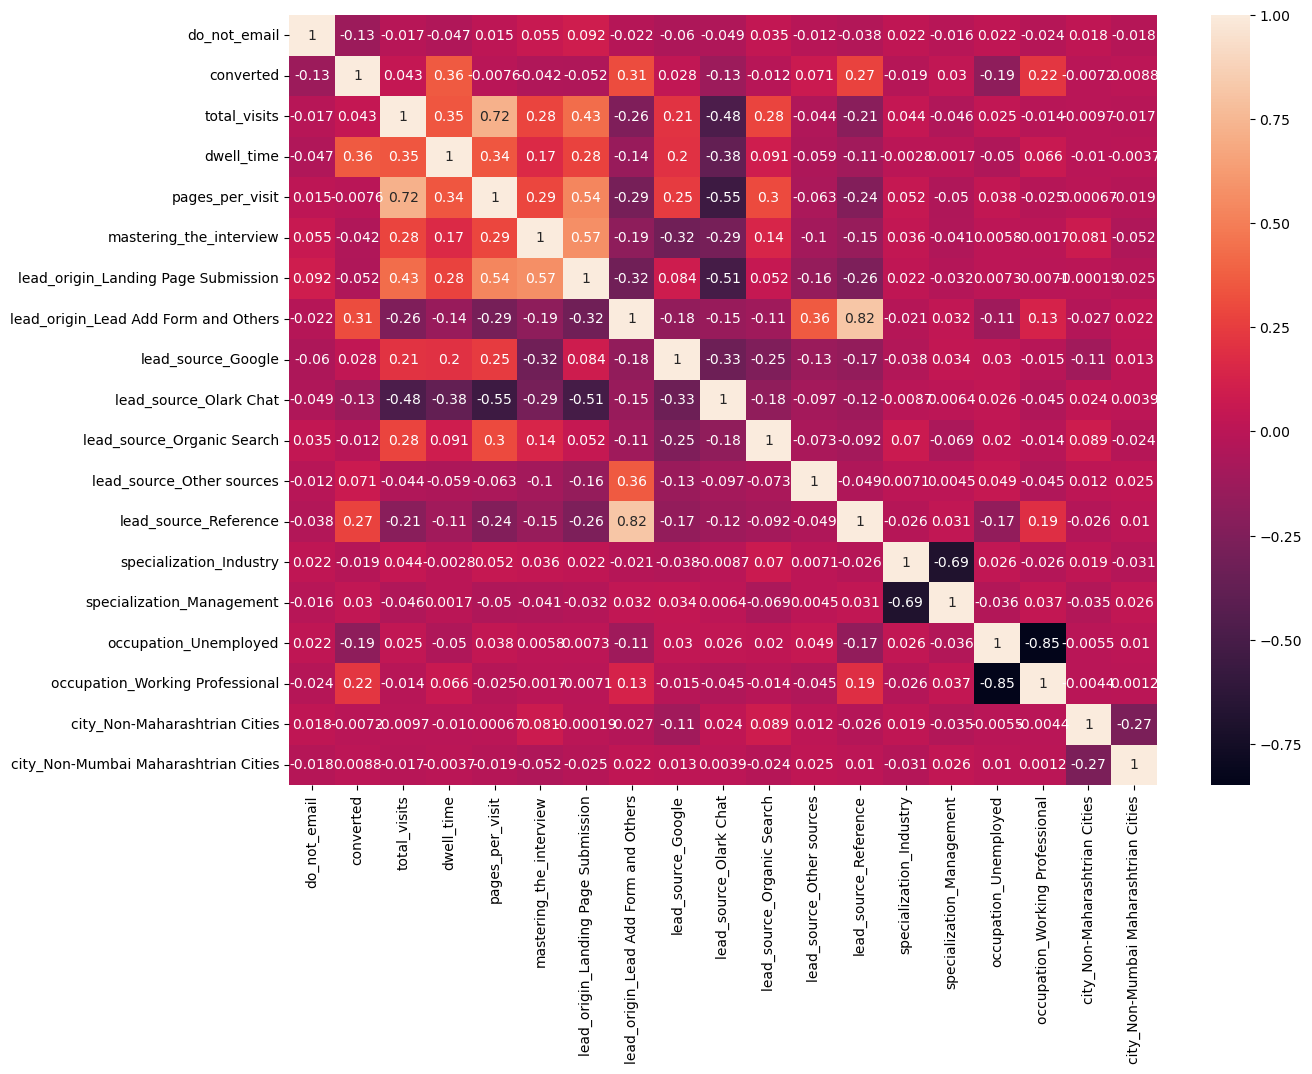

In [66]:
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True)
plt.show()

Taking the cutoff to be .8 -  
'lead_origin_Lead Add Form and Others' and 'lead_source_Reference' show a high correlation of .82  
'occupation_Working_Professional' and 'occupation_Unemployed' show a high correlation of .84

In [67]:
# Drop highly correlated dummy variables
df.drop(['lead_origin_Lead Add Form and Others', 
                     'occupation_Unemployed'], axis = 1, inplace = True)

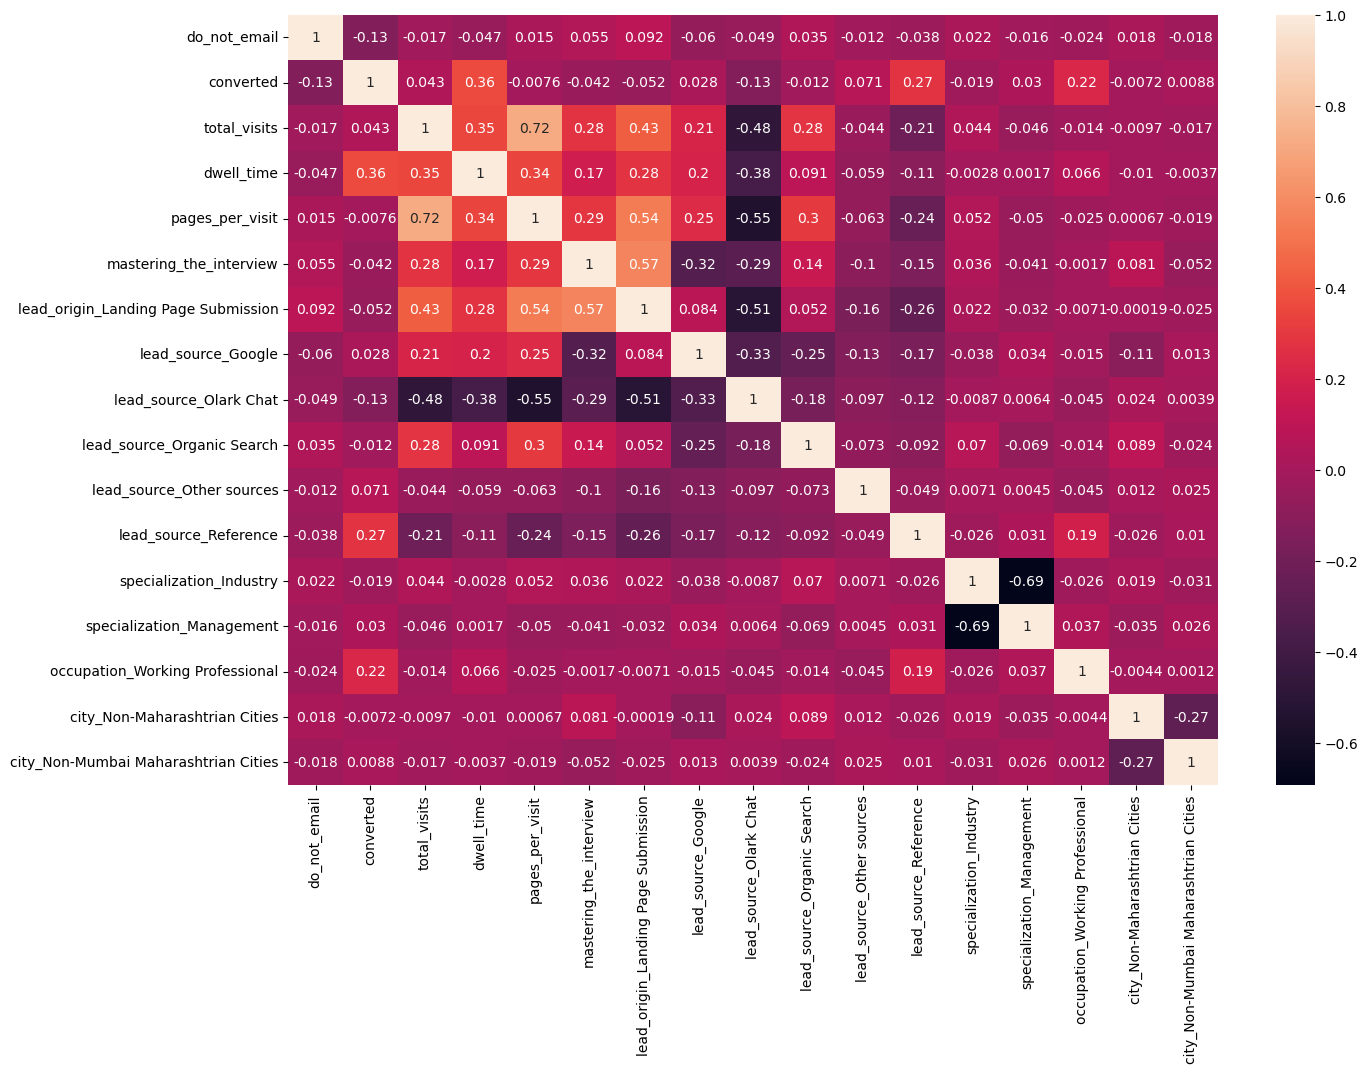

In [68]:
# Checking the correlation matrix again
plt.figure(figsize = (15,10))       
sns.heatmap(df.corr(),annot = True)
plt.show()

### 5.3 - Train-test split

In [69]:
# Isolating the target variable
y=df.pop('converted')

# Remaining variables (including the independent variables)
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)

(6363, 16)
(2727, 16)


In [71]:
X_train.head()

,do_not_email,total_visits,dwell_time,pages_per_visit,mastering_the_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other sources,lead_source_Reference,specialization_Industry,specialization_Management,occupation_Working Professional,city_Non-Maharashtrian Cities,city_Non-Mumbai Maharashtrian Cities
2401,0,4,75,4.0,0,1,1,0,0,0,0,0,1,0,0,0
6293,0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,0,0
1393,0,3,429,2.0,0,0,0,0,0,1,0,0,1,0,0,0
301,0,4,595,4.0,0,1,1,0,0,0,0,1,0,0,0,1
7211,0,1,884,1.0,1,0,0,0,0,0,1,0,1,1,0,0


In [72]:
y_train

2401    0
6293    0
1393    1
301     1
7211    1
       ..
5825    1
5264    0
5468    0
878     0
7387    1
Name: converted, Length: 6363, dtype: int64

### 5.4 -  Feature scaling of continuous variables

In [73]:
scaler = StandardScaler()

X_train[['total_visits','dwell_time','pages_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','dwell_time','pages_per_visit']])


In [74]:
# checking the conversion rate
conversion = (sum(y)/len(y))*100
conversion

38.448844884488445

## Step 6: Model Building

Since we have only 15 features, we can use all of them. No need for RFE.

In [75]:
# Function to get VIF

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [76]:
# creating a list of all columns
cols = X_train.columns

### Model 1

In [77]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.9
Date:                Sat, 26 Aug 2023   Deviance:                       6517.8
Time:                        13:11:17   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Model 2

In [78]:
# Dropping variable 'mastering_the_interview' as it has the highest p-value

X_train.drop('mastering_the_interview', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.9
Date:                Sat, 26 Aug 2023   Deviance:                       6517.8
Time:                        13:11:18   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Model 3

In [79]:
# Dropping variable 'lead_origin_Landing Page Submission' as it has the highest p-value

X_train.drop('lead_origin_Landing Page Submission', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.9
Date:                Sat, 26 Aug 2023   Deviance:                       6517.9
Time:                        13:11:18   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Model 4

In [80]:
# Dropping variable 'specialization_Management' as it has the highest p-value

X_train.drop('specialization_Management', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3259.6
Date:                Sat, 26 Aug 2023   Deviance:                       6519.3
Time:                        13:11:18   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2666
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Model 5

In [81]:
# Dropping variable 'city_Non-Mumbai Maharashtrian Cities' as it has the highest p-value

X_train.drop('city_Non-Mumbai Maharashtrian Cities', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3260.2
Date:                Sat, 26 Aug 2023   Deviance:                       6520.4
Time:                        13:11:18   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2664
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Model 6

In [82]:
# Dropping variable 'specialization_Industry' as it has the highest p-value

X_train.drop('specialization_Industry', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3260.2
Date:                Sat, 26 Aug 2023   Deviance:                       6520.4
Time:                        13:11:19   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2664
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Model 7

In [83]:
# Dropping variable 'lead_source_Organic Search' as it has the highest p-value

X_train.drop('lead_source_Organic Search', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3261.2
Date:                Sat, 26 Aug 2023   Deviance:                       6522.5
Time:                        13:11:19   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2662
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Model 8

In [84]:
# Dropping variable 'city_Non-Maharashtrian Cities' as it has the highest p-value

X_train.drop('city_Non-Maharashtrian Cities', axis = 1, inplace=True)

X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

get_vif(X_train.columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3262.2
Date:                Sat, 26 Aug 2023   Deviance:                       6524.5
Time:                        13:11:19   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2660
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

P-values and VIF are in acceptable range. Model 8 will be our final model

## Step 7: Prediction

In [85]:
# Predicting values based on x-values of the train dataset
y_train_pred = res.predict(X_train_sm)

In [86]:
y_train_pred

2401    0.159000
6293    0.222578
1393    0.630950
301     0.335920
7211    0.991971
          ...   
5825    0.959512
5264    0.487468
5468    0.487468
878     0.056656
7387    0.683764
Length: 6363, dtype: float64

In [87]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.15900042, 0.22257812, 0.6309501 , ..., 0.48746778, 0.05665557,
       0.6837639 ])

In [88]:
# Creating a dataframe with given convertion rate and the predicted probablity of conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.159000
1,0,0.222578
2,1,0.630950
3,1,0.335920
4,1,0.991971


In [89]:
# Setting cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.159000,0
1,0,0.222578,0
2,1,0.630950,1
3,1,0.335920,0
4,1,0.991971,1


## Step 8: Model Evaluation

### 8.1 - Model evaluation through metrics

In [90]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [91]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3371,  531],
       [1035, 1426]], dtype=int64)

|Column 1     |Column 2     |Column 3 |
|:-----------:|:-----------:|:-------:|
|Predicted →  |Not Converted|Converted|      
|Actual  ↓    |             |         |
|Not Converted|3379         |523      |
|Converted    |1034         |1427     |

In [92]:
# Calculating accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7538896746817539


Our model has roughly 76% accuracy, which is a decent value.

In [93]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [94]:
# Calculating sensitivity
TP/(TP+FN)

0.5794392523364486

In 58% of the cases we accurately predict if lead gets converted.

In [95]:
# Calculating specificity
TN/(TN+FP)

0.8639159405433111

In roughly 87% of the cases, we accurately predict if lead does not get converted.

In [96]:
# Calculating Precision
TP/(TP+FP)

0.7286663260091978

In 73% of the cases, when we predicted that the lead would convert, it did convert. This is descent

In [97]:
# Calculating Recall (same as sensitivity)
TP/(TP+FN)

0.5794392523364486

Out of all leads which got converted, we only correctly predicted 58%

Clearly these metrics can be improved. We are concerned with identifying "hot leads", i.e. leads which are more likely to convert. Therefore, our main focus is to get the model to predict a greater number of actual converted leads while minimizing false positives, i.e., out of all the leads we predict will convert, a significant number should convert. Hence, we have to maximize precision. The goal of this ecercise is to focus more on the ones which could get actually yield positive results, even if we have to let go of some leads which are somewhat likely to convert

### 8.2 - Optimizing cut-off (Precision-Recall)

Previous cut off was arbitrarily chosen. Now we find the one which optimizes precision and recall

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6358    1
 6359    0
 6360    0
 6361    0
 6362    1
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6358    1
 6359    0
 6360    0
 6361    0
 6362    1
 Name: Predicted, Length: 6363, dtype: int64)

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

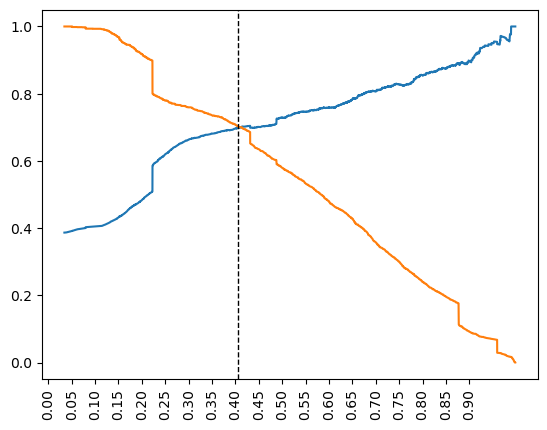

In [101]:
x1 = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
plt.plot(thresholds, p[:-1],)
plt.plot(thresholds, r[:-1],)
plt.xticks(x1, rotation = 90)
plt.axvline(.405, color='k', linestyle='dashed', linewidth=1)
plt.show()

We see the cutoff point of 0.405 gives us the best trade off between precision and recall. However we want greater precision. The CEO of the company has set the target of 80% conversion rate. Therefore we need to increase the precision of the model. With a cutoff of 0.5, we got a precision of 73%. Let's increase the cutoff to see what happens

In [103]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.159000,0,1,1,0,0,0,0,0,0,0,0
1,0,0.222578,0,1,1,1,0,0,0,0,0,0,0
2,1,0.630950,1,1,1,1,1,1,1,1,0,0,0
3,1,0.335920,0,1,1,1,1,0,0,0,0,0,0
4,1,0.991971,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Precision','Recall'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    Recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Precision,Recall]
cutoff_df

,Probability,Accuracy,Precision,Recall
0.0,0.0,0.386767,0.386767,1.000000
0.1,0.1,0.432815,0.404904,0.993092
0.2,0.2,0.589187,0.483622,0.917920
0.3,0.3,0.758290,0.663943,0.759447
0.4,0.4,0.767720,0.696364,0.708249
0.5,0.5,0.753890,0.728666,0.579439
0.6,0.6,0.739903,0.758997,0.479886
0.7,0.7,0.718529,0.807339,0.357578
0.8,0.8,0.690240,0.854046,0.240146
0.9,0.9,0.644664,0.896825,0.091833


We see the cutoff of 0.7 gives us the required precision of around 80%

In [106]:
y_train_pred_final=y_train_pred_final[['Converted', 'Converted_Prob',      'Predicted']]

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,final_predicted
0,0,0.159000,0,0
1,0,0.222578,0,0
2,1,0.630950,1,0
3,1,0.335920,0,0
4,1,0.991971,1,1


#### Calculating the necessary metrics for model evaluation

In [108]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7185289957567186

Our model has 72% accuracy, which is decent

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8073394495412844

Our model has high precision of 80.7%. This is in the ballpark of what the CEO demanded.

In [111]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.35757822023567654

Our model has a low recall of roughly 36% i.e., out of all leads which converted, we only predicted 35% of them. This is alright however, as our goal was to maximize precision and get to the "hot leads".

### 8.3 - Predictions on test set

In [112]:
# Scaling the continuous variables in the test dataset
X_test[['total_visits','dwell_time','pages_per_visit']] = scaler.transform(X_test[['total_visits','dwell_time','pages_per_visit']])

In [113]:
# Making the test dataset fit to be used by the model

# Feature elimination
X_test = X_test[X_train.columns]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [114]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to a datafram
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming column 
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'converted_prob'})

In [115]:
y_test_pred_final

,converted,converted_prob
0,1,0.222578
1,1,0.359910
2,0,0.247429
3,0,0.222578
4,1,0.804032
...,...,...
2722,1,0.877058
2723,0,0.264726
2724,1,0.884301
2725,1,0.222578


In [116]:
# Making predictions using 0.7 as the cut off
y_test_pred_final['final_predicted'] = y_test_pred_final.converted_prob.map(lambda x: 1 if x > 0.7 else 0)
y_test_pred_final

,converted,converted_prob,final_predicted
0,1,0.222578,0
1,1,0.359910,0
2,0,0.247429,0
3,0,0.222578,0
4,1,0.804032,1
...,...,...,...
2722,1,0.877058,1
2723,0,0.264726,0
2724,1,0.884301,1
2725,1,0.222578,0


In [117]:
# Checking accuracy
metrics.accuracy_score(y_test_pred_final['converted'], y_test_pred_final.final_predicted)

0.7187385405207187

In [118]:
# Precision
precision_score(y_test_pred_final['converted'], y_test_pred_final.final_predicted)

0.8068965517241379

We see a high precision of 80.6%. Our model generalizes well to the test dataset. This is in accordance with the demand from the management

In [119]:
# Recall
recall_score(y_test_pred_final['converted'], y_test_pred_final.final_predicted)

0.33945841392649906

Our model has a low recall of roughly 34% i.e., out of all leads which converted, we only predicted 34% of them. This is in line with what our model predicted on the train dataset.

## Step 9: Interpretation and conclusion

### 9.1 - Equation of the best fitted curve

General equation - 

$P = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x)}}\$

$ln(\frac{P}{1-P}) = \beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x$

$P = e^{(\beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x)}.(1-P)$

The probability that a positive (eg - lead gets converted) is $e^{(\beta_{0}+\beta_{1}x+\beta_{2}x+...\beta_{n}x)}$ that of the negative (lead doesn't get converted).

Therefore, greater the coefficient, greater the impact and greater the importance of the feature
<br>
#### Coefficients in a descending order-  
lead_source_Reference: 3.9406  
lead_source_Other sources: 1.6997  
do_not_email: - 1.1951  
occupation_Working Professional: - 1.2006  
constant: - 1.0649  
dwell_time: 1.0429  
lead_source_Olark Chat: 0.7250  
lead_source_Google: 0.2555  
total_visits: 0.1262  
pages_per_visit: - 0.1238


These are the features which are significant (in the order of the most important to the least important).

### 9.2 - Creating Lead Scores

We will do this by multiplying the `y_train_pred` and `y_test_pred` values i.e., 'converted_prob' (probability that a lead will be converted) by 100 and round off the values to get whole numbers. The values ranging from 0 to 1 will now range from 0 to 100, which is what we needed

#### For the train data set

In [120]:
y_train_pred_final['lead_score'] = round(y_train_pred_final.Converted_Prob*100,0)

In [121]:
y_train_pred_final.head(10)

,Converted,Converted_Prob,Predicted,final_predicted,lead_score
0,0,0.159000,0,0,16.0
1,0,0.222578,0,0,22.0
2,1,0.630950,1,0,63.0
3,1,0.335920,0,0,34.0
4,1,0.991971,1,1,99.0
5,0,0.214882,0,0,21.0
6,1,0.877058,1,1,88.0
7,0,0.871010,1,1,87.0
8,1,0.431427,0,0,43.0
9,0,0.194447,0,0,19.0


#### For test data

In [122]:
y_test_pred_final['lead_score'] = round(y_test_pred_final.converted_prob*100,0)

In [123]:
y_test_pred_final.head(10)

,converted,converted_prob,final_predicted,lead_score
0,1,0.222578,0,22.0
1,1,0.359910,0,36.0
2,0,0.247429,0,25.0
3,0,0.222578,0,22.0
4,1,0.804032,1,80.0
5,0,0.192677,0,19.0
6,1,0.644018,0,64.0
7,0,0.222578,0,22.0
8,0,0.171406,0,17.0
9,0,0.283400,0,28.0


The `lead_score` parameter tells us how likely a lead is to be converted to a customer. The probability of conversion increases in the order 0 to 100. For our case, when we wanted roughly 80% precision, the cutoff lead score for this condition would be 70. If lead conversion doesn't need to be as aggressive, we can reduce this cutoff to increase recall

### 9.3 - Conclusion

- Leads brought in through references, other smaller websites (Wellingak),Olark chat and google are more likely to become hot leads and convert (in this order)
- If a lead chooses to not receive emails and/or is unemployed it might be more likely that they will not convert.
- Customers who spend a lot of time on our website show greater chances of being 'hot leads'
1. In situations where the company wants to conserve resources and time and reach out to only those leads which are most likely to convert i.e. 'hot leads' -  
- We'd want to maximize precision (i.e. out of the leads we predict will convert, most of them should)
- Keep the cut-off lead score high at 70, i.e. reach out to customers with lead scores above 70
2. In situations where the company wants to reach out to as many leads as possible even though they don't have a very strong chance to convert - 
- We'd want to maximize recall (i.e. out of all the leads which could convert, we'd want to get to most of them)
- Keep the cut-off lead score low, below 30, i.e. reach out to customers with lead scores below 30


#### 9.4 - Recommendations

- References and Wellingak websites show the highest rate of conversion. They just don’t have the same traffic as google or Olark. Perhaps we could help drive more traffic there and as a result get more customers. 
- Leads through Google do show good conversion rate, however it isn’t as high as compared to the previous 2, because the competition is outdoing us in terms of SEO (search engine optimization), other marketing or course structure and material. We’ll have to invest in digital marketing via SEO and make our presence known on other websites where our presence isn’t significant (like facebook etc.)
- One of the reasons people choose to not receive emails is probably because they consider reminders to be annoying/ not necessary. We can add a small question about practical applications of the course that our lead was checking out. Practical applications help make it more palpable and gets the person interested. We could offer insight from the course from different chapters with our mails which is not necessarily known in the public domain. However, the mechanism behind the insight would of course be behind the paywall. 
- Since the highest conversion is amongst working professionals, we should structure our course to suit their needs more and target them in their internet spaces (LinkedIn, facebook groups, subreddits, blogs, stackexchanges about specific professions)
- The UI of our site should be great, as those who are interested visit it more often and spend more time there. If the UI is not good, then the prestige that our website, courses or company could hold in their minds would be lost. A comfortable experience also help others think better of the company and hence the courses.



